## Importing dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
covid_data = pd.read_csv('data.csv')

In [3]:
covid_data.head()

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,male,66.0,70,38.6,88.0,75,Infected
1,2,female,56.0,74,39.6,88.0,70,Infected
2,3,male,46.0,82,37.2,98.0,83,Non Infected
3,4,female,60.0,90,38.6,98.0,75,Non Infected
4,5,male,58.0,72,39.6,93.0,78,Infected


In [4]:
covid_data.shape

(1085, 8)

In [5]:
covid_data.describe()

,id,age,heart_rate,temperature,SpO2_saturation,bpm
count,1085.000000,843.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,543.000000,49.483689,89.812903,38.562488,66.707465,71.221198
std,313.356825,18.255334,19.685747,4.592419,30.251069,13.148559
min,1.000000,0.250000,47.000000,36.000000,20.000000,44.000000
25%,272.000000,35.000000,72.000000,38.000000,30.000000,59.000000
50%,543.000000,51.000000,91.000000,38.100000,82.000000,72.000000
75%,814.000000,64.000000,110.000000,38.500000,87.300000,81.000000
max,1085.000000,96.000000,120.000000,95.000000,340.000000,109.000000


In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1085 non-null   int64  
 1   gender           902 non-null    object 
 2   age              843 non-null    float64
 3   heart_rate       1085 non-null   int64  
 4   temperature      1085 non-null   float64
 5   SpO2_saturation  1085 non-null   float64
 6   bpm              1085 non-null   int64  
 7   Health_status    1085 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 67.9+ KB


In [7]:
covid_data.isnull().sum()

id                   0
gender             183
age                242
heart_rate           0
temperature          0
SpO2_saturation      0
bpm                  0
Health_status        0
dtype: int64

### Encoding Gender data into 
* 0-> male
* 1->female


In [8]:
covid_data.replace({'gender':{'male':0,'female':1}},inplace=True)

In [9]:
covid_data['gender']

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1080    NaN
1081    NaN
1082    0.0
1083    0.0
1084    0.0
Name: gender, Length: 1085, dtype: float64

## Encoding Health Status Data
* Infected->1
* Non Infected->0

In [10]:
covid_data.replace({'Health_status':{'Infected':1,'Non Infected':0,'Non infected':0}},inplace=True)

In [11]:
covid_data.head()

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,1,0.0,66.0,70,38.6,88.0,75,1
1,2,1.0,56.0,74,39.6,88.0,70,1
2,3,0.0,46.0,82,37.2,98.0,83,0
3,4,1.0,60.0,90,38.6,98.0,75,0
4,5,0.0,58.0,72,39.6,93.0,78,1


## Handling the missing values

In [12]:
covid_data.describe()

,id,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
count,1085.000000,902.000000,843.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,543.000000,0.423503,49.483689,89.812903,38.562488,66.707465,71.221198,0.870968
std,313.356825,0.494388,18.255334,19.685747,4.592419,30.251069,13.148559,0.335390
min,1.000000,0.000000,0.250000,47.000000,36.000000,20.000000,44.000000,0.000000
25%,272.000000,0.000000,35.000000,72.000000,38.000000,30.000000,59.000000,1.000000
50%,543.000000,0.000000,51.000000,91.000000,38.100000,82.000000,72.000000,1.000000
75%,814.000000,1.000000,64.000000,110.000000,38.500000,87.300000,81.000000,1.000000
max,1085.000000,1.000000,96.000000,120.000000,95.000000,340.000000,109.000000,1.000000


In [13]:
covid_data['gender'] = covid_data['gender'].fillna(covid_data['gender'].mean())

In [14]:
covid_data['age'] = covid_data['age'].fillna(covid_data['age'].mean())

In [15]:
covid_data.isnull().sum()

id                 0
gender             0
age                0
heart_rate         0
temperature        0
SpO2_saturation    0
bpm                0
Health_status      0
dtype: int64

In [16]:
covid_data['Health_status'].value_counts()

1    945
0    140
Name: Health_status, dtype: int64

## Data Visualization

In [17]:
sns.set()

C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Health_status', ylabel='count'>

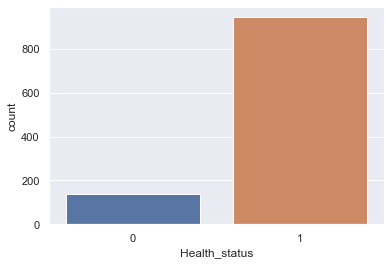

In [18]:
sns.countplot('Health_status',data = covid_data)

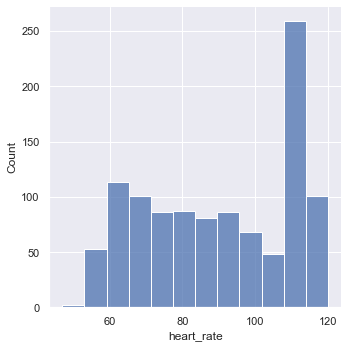

In [19]:
sns.displot(covid_data['heart_rate'])

## Creating a Heat Map of the data

In [20]:
correlation = covid_data.corr()

<AxesSubplot:>

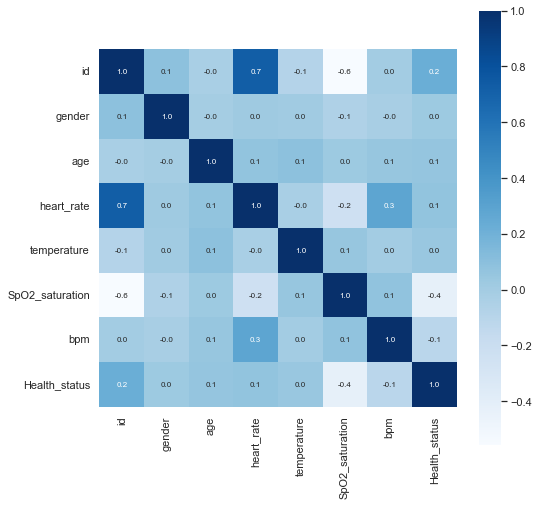

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')

## Separating the labels and the features

In [22]:
X = covid_data.drop(['id','Health_status'],axis=1)

In [23]:
Y = covid_data['Health_status']

In [24]:
print(X,Y)

        gender        age  heart_rate  temperature  SpO2_saturation  bpm
0     0.000000  66.000000          70         38.6             88.0   75
1     1.000000  56.000000          74         39.6             88.0   70
2     0.000000  46.000000          82         37.2             98.0   83
3     1.000000  60.000000          90         38.6             98.0   75
4     0.000000  58.000000          72         39.6             93.0   78
...        ...        ...         ...          ...              ...  ...
1080  0.423503  24.000000         110         38.0             30.0   72
1081  0.423503  35.000000         110         38.0             30.0   74
1082  0.000000  49.483689         110         38.0             30.0   68
1083  0.000000  49.483689         110         38.0             30.0   67
1084  0.000000  70.000000         110         38.0             30.0   70

[1085 rows x 6 columns] 0       1
1       1
2       0
3       0
4       1
       ..
1080    1
1081    1
1082    1
1083    1

## Spitting the data into training data and test data

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(1085, 6) (868, 6) (217, 6)


In [27]:
covid_data['Health_status'].value_counts()

1    945
0    140
Name: Health_status, dtype: int64

## Model Training

In [28]:
model = XGBClassifier()

In [29]:
model.fit(X_train,Y_train)

[21:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Model Evaluation

In [30]:
# Accuracy On training Data
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,training_data_prediction)
print('Accuracy score of Training data',training_data_accuracy)

Accuracy score of Training data 0.9988479262672811


In [31]:
# Accuracy On testing Data
testing_data_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test,testing_data_prediction)
print('Accuracy score of Training data',testing_data_accuracy)

Accuracy score of Training data 0.9953917050691244


## Making Predictive System

In [61]:
input = (0,37,97,37.2,96,89)
input_asarray = np.asarray(input)
reshape_input = input_asarray.reshape(1,-1)
prediction = model.predict(reshape_input)

print(prediction)
if(prediction[0]==1):
    print('The Patient is Covid Positive')
else:
    print('The Patient is Covid Negative')

[0]
The Patient is Covid Negative
